In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
path = '../img/test1.jpg'
img = cv2.imread(path)

In [18]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

In [22]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros(img.shape[:-1], np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)
print(cnt)

[[[888 229]]

 [[888 231]]

 [[886 233]]

 [[885 233]]

 [[884 232]]

 [[874 232]]

 [[873 231]]

 [[853 231]]

 [[852 232]]

 [[824 232]]

 [[823 233]]

 [[796 233]]

 [[795 234]]

 [[759 234]]

 [[758 235]]

 [[728 235]]

 [[727 236]]

 [[696 236]]

 [[695 237]]

 [[661 237]]

 [[660 238]]

 [[643 238]]

 [[642 237]]

 [[642 234]]

 [[641 233]]

 [[639 233]]

 [[638 234]]

 [[638 238]]

 [[640 238]]

 [[641 239]]

 [[640 240]]

 [[640 244]]

 [[641 245]]

 [[641 246]]

 [[640 247]]

 [[638 247]]

 [[637 248]]

 [[634 248]]

 [[633 249]]

 [[619 249]]

 [[618 250]]

 [[599 250]]

 [[598 251]]

 [[597 251]]

 [[596 252]]

 [[596 254]]

 [[597 255]]

 [[599 255]]

 [[600 256]]

 [[599 257]]

 [[598 257]]

 [[597 258]]

 [[596 258]]

 [[596 259]]

 [[595 260]]

 [[595 262]]

 [[596 263]]

 [[596 265]]

 [[595 266]]

 [[595 290]]

 [[594 291]]

 [[593 290]]

 [[593 284]]

 [[592 283]]

 [[590 283]]

 [[589 284]]

 [[589 311]]

 [[588 312]]

 [[588 328]]

 [[587 329]]

 [[587 347]]

 [[590

In [20]:
dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

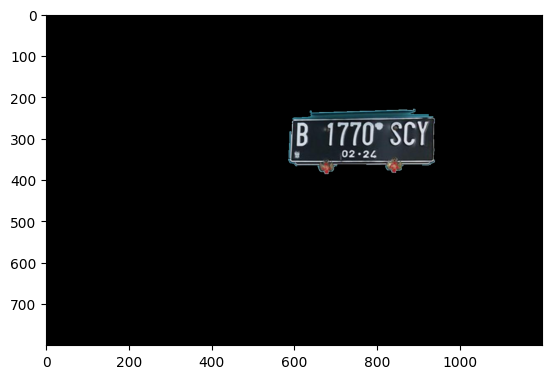

In [21]:
plt.imshow(segmented)